<a href="https://colab.research.google.com/github/Anusarakh/DPDM2021/blob/main/Data_Preprocessing(Chapter3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

เป็นกระบวนการที่สำคัญมากอย่างหนึ่งในการทำ เหมืองข้อมูลหากการเตรียมข้อมูลทำได้ไม่ดีมีโอกาสสูงที่จะก่อให้เกิดความเสียหายในขั้นตอนอื่นๆอาจส่งผลให้ผลการวิเคราะห์หรือการตีความจาก การนำข้อมูลไปใช้ ผิดเพี้ยนไปบทนี้จะช่วยให้นิสิตสามารถทำการเตรียมข้อมูลได้อย่างมีประสิทธิภาพมากขึ้น ลดงานในอนาคต และได้ประโยชน์สูงสุดจากการเตรียมข้อมูล

## เทคนิคการเตรียมข้อมูล
  การเตรียมข้อมูลสำหรับ Data Miningเป็นขั้นตอนก่อนทำเหมืองข้อมูล เนื่องจากข้อมูลใน ความเป็นจริงอาจยังต้องการตรวจสอบความถูกต้องซึ่งอาจมีข้อมูลลักษณะดังนี้ คือข้อมูลไม่สมบูรณ์ (incomplete data) เช่น ค่าของ คุณลักษณะขาด หาย(missing value) ขาดคุณลักษณะที่ น่าสนใจหรือขาด รายละเอียดของข้อมูลข้อมูลรบกวน (noisy data) เช่น ข้อมูลมีค่าผิดพลาด (error) หรือมีค่าผิดปกติ (Outliers)
ข้อมูลไม่สอดคล้อง (Inconsistent data) เช่น ข้อมูล เดียวกัน แต่ตั้งชื่อต่างกัน หรือใช้ค่าแทนข้อมูลที่ต่างกัน

  * การจัดการข้อมูลที่เป็นค่าว่าง (Data cleaning)
  * การผสานข้อมูล(Data integration)
  * การแปลงข้อมูล (Data transfomation)
  * การลดรูปข้อมูล (Data reduction)

In [ ]:

import pandas as pd # ทำงาน


In [ ]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
path = '/content/drive/My Drive/DPDM2021_DATA'
data = pd.read_csv(os.path.join(path,'thailand_covid-19_testing_data.csv'))
data

,Date,positive,Total Testing,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121
0,Cannot specify date,2963,32131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2020,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12,NaN,13,NaN,14,NaN,15,NaN,16,NaN,17,NaN,18,NaN,19,NaN,20,NaN,21,NaN,22,NaN,23,NaN,24,NaN,25,NaN,26,NaN,27,NaN,28,NaN,29,NaN,30,NaN,31,NaN
2,2/1/2020,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Pos,Pos,Total,Pos,Total,Pos,Total,Pos,Total,Pos,Pos,Total,Pos,Total,Pos,Total,Pos,Total,Pos,Pos,Total,Pos,Total,Pos,Total,Pos,Total,Pos,Pos,Total,Pos,Total,Pos,Total,Pos,Total,Pos,Pos,Pos,Pos
3,3/1/2020,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4/1/2020,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,20/7/2021,68403,10152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
568,21/7/2021,82325,12210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,22/7/2021,62846,10623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570,23/7/2021,58851,1

In [ ]:
data_cases = pd.read_csv(os.path.join(path,'confirmed-cases.csv')) 
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
512617,512618,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN
512618,512619,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN
512619,512620,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN
512620,512621,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN


### การชี้ข้อมูลในตาราง

In [ ]:
data_cases[['risk','age']] # ชี้โดยใช้หัวตารางหรือชื่อแถว

,risk,age
0,คนต่างชาติเดินทางมาจากต่างประเทศ,61.0
1,คนต่างชาติเดินทางมาจากต่างประเทศ,74.0
2,คนต่างชาติเดินทางมาจากต่างประเทศ,73.0
3,คนต่างชาติเดินทางมาจากต่างประเทศ,68.0
4,คนต่างชาติเดินทางมาจากต่างประเทศ,66.0
...,...,...
512617,ทัณฑสถาน/เรือนจำ,NaN
512618,ทัณฑสถาน/เรือนจำ,NaN
512619,ทัณฑสถาน/เรือนจำ,NaN
512620,ทัณฑสถาน/เรือนจำ,NaN


In [ ]:
data_cases['risk'][666] # เป็นการชี้ข้อมูลของลิส คนที่ 666

'สนามมวย'

### ชี้ข้อมูลโดยใช้ .iloc [] (แปลงมุมมองให้เป็น matrix)

In [ ]:
data_cases.iloc[4,4]  # ชี้ข้อมูลโดยการเลือกแถวและหลัก [แถว,หลัก]  ข้อดีสามารถจัดตารางข้อมูลที่เราต้องการได้

66.0

In [ ]:
data_cases.iloc[-50:,[3,6,8]]

,sex,nationality,risk
512572,หญิง,NaN,ทัณฑสถาน/เรือนจำ
512573,หญิง,NaN,ทัณฑสถาน/เรือนจำ
512574,หญิง,NaN,ทัณฑสถาน/เรือนจำ
512575,หญิง,NaN,ทัณฑสถาน/เรือนจำ
512576,หญิง,NaN,ทัณฑสถาน/เรือนจำ
512577,หญิง,NaN,ทัณฑสถาน/เรือนจำ
512578,หญิง,NaN,ทัณฑสถาน/เรือนจำ
512579,หญิง,NaN,ทัณฑสถาน/เรือนจำ
512580,หญิง,NaN,ทัณฑสถาน/เรือนจำ
512581,หญิง,NaN,ทัณฑสถาน/เรือนจำ


### Descriptive Statistical of Data

สถิติพื้นฐาน 

In [ ]:
data_cases.describe()


,No.,age
count,512622.000000,462839.000000
mean,256311.500000,35.529470
std,147981.369183,16.153885
min,1.000000,1.000000
25%,128156.250000,25.000000
50%,256311.500000,34.000000
75%,384466.750000,46.000000
max,512622.000000,108.000000


### Missing Value

ข้อมูลอาจจะขาดหายไป เนื่องจาก
ไม่มีข้อมูล
กรอกข้อมูลผิดพลาด
การแทนที่ข้อมูลที่ขาดหายไป
แทนที่ด้วยค่า เช่น N/A หรือ none หรือ null
แทนที่ด้วยค่าน้อยที่สุด ในกรณีที่แอตทริบิวต์เป็น ตัวเลข (numeric)
แทนที่ด้วยค่ามากที่สุด ในกรณีที่แอตทริบิวต์เป็นตัวเลข (numeric)
แทนที่ด้วยค่าเฉลี่ย (mean/average) ในกรณีที่แอตทริ บิวต์เป็นตัวเลข (numeric)
แทนที่ด้วยค่าฐานนิยม (mode) ในกรณีที่แอตทริบิวต์ เป็นกลุ่ม (nominal)
แทนที่ด้วยค่า 0 เช่น จำนวนบุตร
แทนที่ด้วยค่าที่ระบุเอง เช่น ไม่ระบุ

* Noll

* NaN = Nor a Number 

* NA = Not a Valiable

หากมีข้อความดังกล่าวคือไม่มีข้อมูลหรือไม่แสดงค่า

In [ ]:
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
512617,512618,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN
512618,512619,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN
512619,512620,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN
512620,512621,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN


In [ ]:
data_cases.isnull() #  .isnull เป็นคำสั่งที่ใช้ดู missing  ค่าที่เป็นนMissing จะแสดง True ส่วนค่าไหนที่แสดง False แสดงว่าค่านั้นไม่ใช่ missing

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,False,False,True,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
512617,False,False,False,False,True,True,True,False,False,True,True
512618,False,False,False,False,True,True,True,False,False,True,True
512619,False,False,False,False,True,True,True,False,False,True,True
512620,False,False,False,False,True,True,True,False,False,True,True


In [ ]:
data_cases.isnull().any()  # .any คือ สรุปในด้าน columns หรือ  or ในแนว columns  ใช้ควบคู่กับ .isnull

No.                      False
announce_date            False
Notified date             True
sex                       True
age                       True
Unit                      True
nationality               True
province_of_isolation     True
risk                      True
province_of_onset         True
district_of_onset         True
dtype: bool

In [ ]:
data_cases.isnull().any() .any() # สามารถเขียน .any ซ้อน .any ได้

True

#### Handling Missing Value 1 (ลบค่าmissing ออก)

In [ ]:
data_cases.shape  

(512622, 11)

In [ ]:
data_cases_M1 = data_cases.dropna()  # คึำสั่ง .dropna คือคำสั่งที่ลบ missing 

In [ ]:
data_cases_M1.shape  # M1 คือ

(362205, 11)

size before drop = 1000

size after drop = 10

we lost 99% of data

In [ ]:
print('size before drop = ',len(data_cases))
print('size before drop = ',len(data_cases_M1))


size before drop =  512622
size before drop =  362205


In [ ]:
print('we lost = ',((len(data_cases)-len(data_cases_M1))/len(data_cases))*100,'% of data')

we lost =  29.342673548930794 % of data


In [ ]:
((len(data_cases)-len(data_cases_M1))/len(data_cases))*100

29.342673548930794

In [ ]:
print(f'size before drop = {len(data_cases)}')
print('size before drop = ',len(data_cases_M1))
print(f'we lost = {((len(data_cases)-len(data_cases_M1))/len(data_cases))*100:.2f}% of data')

size before drop = 512622
size before drop =  362205
we lost = 29.34% of data


#### Handling Missing Value 1.5 (ลบค่า missing เฉพาะใน column ที่เราสนใจ)

In [ ]:
data_cases_M15 = data_cases.dropna(subset=['Notified date', 'sex','age'])
data_cases_M15.shape

(449552, 11)

HW 11

print ของ missing 1.5

size before drop = 1000

size after drop = 10

we lost 99% of data

now we have x% more data than handing_missing1

In [ ]:
print(f'size before drop = {len(data_cases)}')
print(f'size after drop = {len(data_cases_M15)}')
print(f'we lost = {((len(data_cases)-len(data_cases_M15))/len(data_cases))*100:.2f}% of data')
print(f'now we have  {((len(data_cases_M15)-len(data_cases_M1))/len(data_cases))*100:.2f} % more data than handing_missing1')

size before drop = 512622
size after drop = 449552
we lost = 12.30% of data
now we have  17.04 % more data than handing_missing1


In [ ]:
print(f'we lost = {((len(data_cases)-len(data_cases_M15))/len(data_cases))*100:.2f}% of data') # ค่า % หลัง .doopna M15

we lost = 12.30% of data


In [ ]:
print(f'now we have = {(((len(data_cases)-len(data_cases_M15))/len(data_cases))*100)-(((len(data_cases)-len(data_cases_M1))/len(data_cases))*100):.2F} % more data than handing_missing1') # นำ % ที่หาได้จากของ M15 - M1 

now we have = -17.04 % more data than handing_missing1


In [ ]:
print(f'now we have = {(((len(data_cases)-len(data_cases_M1))/len(data_cases))*100)-(((len(data_cases)-len(data_cases_M15))/len(data_cases))*100):.2F} % more data than handing_missing1') # นำ % ที่หาได้จากของ M1 - M15 

now we have = 17.04 % more data than handing_missing1


In [ ]:
print(f'now we have  {((len(data_cases_M15)-len(data_cases_M1))/len(data_cases_M15))*100:.2f} % more data than handing_missing1') # นำ data M15 - data M1 /data_M15

now we have  19.43 % more data than handing_missing1


Handling Mising Value 2  แทนค่าที่เหมาะสมหรือสร้าง class ใหม่

In [ ]:
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
512617,512618,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN
512618,512619,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN
512619,512620,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN
512620,512621,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN


In [ ]:
data_cases['age'].mean(skipna=False)  ## ถ้า function

nan

In [ ]:
data_cases[['Notified date']] = data_cases[['Notified date']].fillna('99/99/9999')

In [ ]:
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,99/99/9999,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,17/1/2020,99/99/9999,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,22/1/2020,99/99/9999,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,99/99/9999,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,24/1/2020,99/99/9999,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
512617,512618,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN
512618,512619,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN
512619,512620,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN
512620,512621,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN


In [ ]:
data_cases.isnull().any()

No.                      False
announce_date            False
Notified date            False
sex                       True
age                       True
Unit                      True
nationality               True
province_of_isolation     True
risk                      True
province_of_onset         True
district_of_onset         True
dtype: bool

ดู column unit 

In [ ]:
set(data_cases['Unit'])  # คำสั่ง set  หาค่า unique values

{' วัน', ' เดือน', nan, 'ปี', 'วัน', 'เดือน'}

#### [PD] วิธีเลือก  record  โดยกำหนดค่า  

In [ ]:
data_cases[data_cases['Unit']=='วัน']

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
19706,19707,2/2/2021,1/2/2021,หญิง,26.0,วัน,Burma,สมุทรสาคร,Cluster สมุทรสาคร,สมุทรสาคร,เมืองสมุทรสาคร
23791,23792,10/2/2021,9/2/2021,หญิง,2.0,วัน,Burma,สมุทรสาคร,Cluster สมุทรสาคร,สมุทรสาคร,เมืองสมุทรสาคร
40962,40963,18/4/2021,17/4/2021,หญิง,3.0,วัน,Thailand,นครราชสีมา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นครราชสีมา,เสิงสาง
57747,57748,27/4/2021,26/4/2021,หญิง,10.0,วัน,Thailand,นครราชสีมา,อยู่ระหว่างการสอบสวน,NaN,NaN
72457,72458,4/5/2021,3/5/2021,หญิง,18.0,วัน,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,สายไหม
...,...,...,...,...,...,...,...,...,...,...,...
443474,443475,22/7/2021,21/7/2021,ชาย,29.0,วัน,Burmese,นครปฐม,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นครปฐม,สามพราน
474582,474583,24/7/2021,23/7/2021,ชาย,22.0,วัน,Thailand,ฉะเชิงเทรา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ฉะเชิงเทรา,บางปะกง
477365,477366,24/7/2021,23/7/2021,หญิง,18.0,วัน,Thailand,สุราษฎร์ธานี,อื่นๆ,สุราษฎร์ธานี,พุนพิน
488901,488902,25/7/2021,24/7/2021,ชาย,2.0,วัน,Thailand,ชลบุรี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ชลบุรี,บางละมุง


In [ ]:
data_cases[data_cases['Unit']==' วัน']

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
138721,138722,27/5/2021,26/5/2021,ชาย,23.0,วัน,Burmese,สมุทรปราการ,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สมุทรปราการ,บางพลี


 python

  data_frame[list_of_logic]   ## list_of_logic มีขนาดเท่ากับจำนวน record ของ data_frame

In [ ]:
data_cases['Unit']=='วัน'  ## list_of_logics

0         False
1         False
2         False
3         False
4         False
          ...  
512617    False
512618    False
512619    False
512620    False
512621    False
Name: Unit, Length: 512622, dtype: bool

In [ ]:
data_cases[data_cases['Unit']=='วัน'].sort_values(by = 'age')

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
339653,339654,12/7/2021,11/7/2021,ชาย,1.0,วัน,Thailand,สมุทรปราการ,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สมุทรปราการ,บางพลี
375821,375822,16/7/2021,15/7/2021,ชาย,1.0,วัน,Cambodian,สมุทรปราการ,อยู่ระหว่างการสอบสวน,สมุทรปราการ,พระสมุทรเจดีย์
367305,367306,15/7/2021,14/7/2021,ชาย,1.0,วัน,Burmese,สมุทรปราการ,การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,สมุทรปราการ,เมืองสมุทรปราการ
377872,377873,16/7/2021,15/7/2021,ชาย,1.0,วัน,Thailand,ศรีสะเกษ,อื่นๆ,กรุงเทพมหานคร,NaN
409055,409056,19/7/2021,18/7/2021,หญิง,1.0,วัน,Burmese,สมุทรปราการ,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สมุทรปราการ,พระประแดง
...,...,...,...,...,...,...,...,...,...,...,...
19706,19707,2/2/2021,1/2/2021,หญิง,26.0,วัน,Burma,สมุทรสาคร,Cluster สมุทรสาคร,สมุทรสาคร,เมืองสมุทรสาคร
321015,321016,10/7/2021,9/7/2021,ชาย,27.0,วัน,Burmese,สมุทรปราการ,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สมุทรปราการ,เมืองสมุทรปราการ
291137,291138,6/7/2021,5/7/2021,หญิง,28.0,วัน,Thailand,สมุทรปราการ,อยู่ระหว่างการสอบสวน,สมุทรปราการ,พระสมุทรเจดีย์
443474,443475,22/7/2021,21/7/2021,ชาย,29.0,วัน,Burmese,นครปฐม,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นครปฐม,สามพราน


Quiz 10 หา records ต่อไปนี้

records ที่ กักตัวที่ขอนแก่น

records ที่ กักตัวที่ ขอนแก่น+โคราช+อุดร

records ที่ เป็นผู้หญิงที่พบเชื้อที่ กทม

records ที่ เป็นผู้ชาย อายุ 18-22 ปี ที่กักตัวที่เชียงใหม่

In [ ]:
data_cases[data_cases['province_of_isolation']=='ขอนแก่น']

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
181,182,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง
463,464,22/3/2020,21/3/2020,หญิง,36.0,ปี,Thailand,ขอนแก่น,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ขอนแก่น,เมือง
1467,1468,30/3/2020,26/3/2020,ชาย,19.0,ปี,Thailand,ขอนแก่น,คนไทยเดินทางกลับจากต่างประเทศ,ขอนแก่น,เมือง
1971,1972,3/4/2020,31/3/2020,หญิง,70.0,ปี,Thailand,ขอนแก่น,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ขอนแก่น,เมือง
2638,2639,15/4/2020,14/4/2020,หญิง,63.0,ปี,Thailand,ขอนแก่น,สัมผัสผู้เดินทางจากต่างประเทศ,ขอนแก่น,น้ำพอง
...,...,...,...,...,...,...,...,...,...,...,...
505598,505599,26/7/2021,25/7/2021,ชาย,19.0,ปี,Thailand,ขอนแก่น,การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,ขอนแก่น,ภูเวียง
505599,505600,26/7/2021,25/7/2021,ชาย,37.0,ปี,Thailand,ขอนแก่น,การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,ขอนแก่น,ภูเวียง
511809,511810,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ขอนแก่น,ทัณฑสถาน/เรือนจำ,NaN,NaN
511810,511811,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ขอนแก่น,ทัณฑสถาน/เรือนจำ,NaN,NaN


records ที่ กักตัวที่ ขอนแก่น+โคราช+อุดร

In [ ]:
data_cases[(data_cases['province_of_isolation']== 'ขอนแก่น')|(data_cases['province_of_isolation']== 'นครราชสีมา')|(data_cases['province_of_isolation']== 'อุดรธานี')] # | 'หรือ' ต้องใส่ () ด้วย data_cases[  (data_cases['...'])  |  (data_cases['...'])  ]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
181,182,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง
189,190,18/3/2020,16/3/2020,ชาย,57.0,ปี,Thailand,นครราชสีมา,สนามมวย,นครราชสีมา,พิมาย
207,208,18/3/2020,16/3/2020,หญิง,30.0,ปี,Thailand,นครราชสีมา,สถานบันเทิง,กรุงเทพมหานคร,NaN
212,213,18/3/2020,14/3/2020,หญิง,22.0,ปี,Thailand,นครราชสีมา,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,นครราชสีมา,วังน้ำเขียว
284,285,20/3/2020,17/3/2020,ชาย,42.0,ปี,Thailand,นครราชสีมา,สนามมวย,นครราชสีมา,เมืองนครราชสีมา
...,...,...,...,...,...,...,...,...,...,...,...
507218,507219,26/7/2021,25/7/2021,หญิง,NaN,NaN,Thailand,นครราชสีมา,อยู่ระหว่างการสอบสวน,NaN,NaN
507219,507220,26/7/2021,25/7/2021,ชาย,NaN,NaN,Thailand,นครราชสีมา,อยู่ระหว่างการสอบสวน,NaN,NaN
511809,511810,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ขอนแก่น,ทัณฑสถาน/เรือนจำ,NaN,NaN
511810,511811,26/7/2021,25/7/2021,ชาย,NaN,NaN,NaN,ขอนแก่น,ทัณฑสถาน/เรือนจำ,NaN,NaN


records ที่ เป็นผู้หญิงที่พบเชื้อที่ กทม

In [ ]:
data_cases[(data_cases['province_of_onset']=='กรุงเทพมหานคร') & (data_cases['sex']== 'หญิง')]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,99/99/9999,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,17/1/2020,99/99/9999,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,24/1/2020,99/99/9999,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
5,6,25/1/2020,99/99/9999,หญิง,33.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
6,7,26/1/2020,99/99/9999,หญิง,57.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
511560,511561,26/7/2021,25/7/2021,หญิง,53.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ธนบุรี
511562,511563,26/7/2021,25/7/2021,หญิง,44.0,ปี,Thailand,กรุงเทพมหานคร,การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,กรุงเทพมหานคร,คลองสามวา
511566,511567,26/7/2021,25/7/2021,หญิง,56.0,ปี,NaN,กรุงเทพมหานคร,การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,กรุงเทพมหานคร,บางขุนเทียน
511574,511575,26/7/2021,25/7/2021,หญิง,45.0,ปี,Thailand,กรุงเทพมหานคร,การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,กรุงเทพมหานคร,ลาดกระบัง


records ที่ เป็นผู้ชาย อายุ 18-22 ปี ที่กักตัวที่เชียงใหม่

In [ ]:
data_cases[(data_cases['sex']=='ชาย') & (data_cases['province_of_isolation']== 'เชียงใหม่')]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
16,17,31/1/2020,99/99/9999,ชาย,28.0,ปี,China,เชียงใหม่,คนต่างชาติเดินทางมาจากต่างประเทศ,เชียงใหม่,หางดง
91,92,15/3/2020,99/99/9999,ชาย,37.0,ปี,Thailand,เชียงใหม่,สนามมวย,เชียงใหม่,แม่ริม
185,186,18/3/2020,99/99/9999,ชาย,31.0,ปี,Thailand,เชียงใหม่,สนามมวย,เชียงใหม่,นครพิงค์
192,193,18/3/2020,99/99/9999,ชาย,32.0,ปี,Thailand,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,NaN
252,253,19/3/2020,99/99/9999,ชาย,25.0,ปี,Thailand,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,NaN
...,...,...,...,...,...,...,...,...,...,...,...
497330,497331,26/7/2021,25/7/2021,ชาย,23.0,ปี,NaN,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,NaN
497340,497341,26/7/2021,25/7/2021,ชาย,35.0,ปี,NaN,เชียงใหม่,อยู่ระหว่างการสอบสวน,เชียงใหม่,เมืองเชียงใหม่
497341,497342,26/7/2021,25/7/2021,ชาย,25.0,ปี,NaN,เชียงใหม่,อื่นๆ,เชียงใหม่,สันกำแพง
497342,497343,26/7/2021,25/7/2021,ชาย,25.0,ปี,NaN,เชียงใหม่,อื่นๆ,เชียงใหม่,NaN


In [ ]:
 data_cases[(data_cases['sex']=='ชาย') & (data_cases['province_of_isolation']== 'เชียงใหม่') &
            (data_cases['age']>=18) &
           (data_cases['age']<=22)]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
1407,1408,30/3/2020,29/3/2020,ชาย,21.0,ปี,Thailand,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,เมือง
30340,30341,9/4/2021,8/4/2021,ชาย,22.0,ปี,Thailand,เชียงใหม่,สถานบันเทิง,เชียงใหม่,เมืองเชียงใหม่
31499,31500,10/4/2021,9/4/2021,ชาย,22.0,ปี,Thailand,เชียงใหม่,สถานบันเทิง,เชียงใหม่,NaN
31500,31501,10/4/2021,9/4/2021,ชาย,22.0,ปี,Thailand,เชียงใหม่,สถานบันเทิง,เชียงใหม่,NaN
31501,31502,10/4/2021,9/4/2021,ชาย,20.0,ปี,Thailand,เชียงใหม่,สถานบันเทิง,เชียงใหม่,NaN
...,...,...,...,...,...,...,...,...,...,...,...
481940,481941,25/7/2021,24/7/2021,ชาย,21.0,ปี,Thailand,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,หางดง
481953,481954,25/7/2021,24/7/2021,ชาย,19.0,ปี,Thailand,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,หางดง
481961,481962,25/7/2021,24/7/2021,ชาย,22.0,ปี,Thailand,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,เชียงดาว
497281,497282,26/7/2021,25/7/2021,ชาย,22.0,ปี,NaN,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,เชียงดาว


In [ ]:
set(data_cases['Unit'])

{' วัน', ' เดือน', nan, 'ปี', 'วัน', 'เดือน'}

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:

from matplotlib import pyplot as plt

In [ ]:

import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

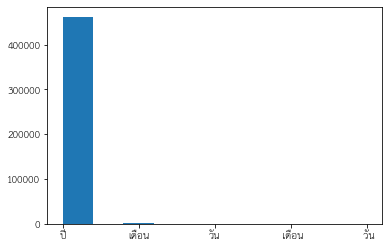

In [ ]:
plt.hist(data_cases['Unit'].dropna());

In [ ]:
data_cases[['Unit']]=data_cases[['Unit']].fillna(' ปี ')

In [ ]:
data_cases[['nationality']] = data_cases[['nationality']].fillna('ไทย?')

In [ ]:
data_cases.isnull().any()

No.                      False
announce_date            False
Notified date            False
sex                       True
age                       True
Unit                     False
nationality              False
province_of_isolation     True
risk                      True
province_of_onset         True
district_of_onset         True
dtype: bool

Handling Mising Value 3 แทนค่าด้วยค่ากลาง   mean mod medaen

In [ ]:
data_cases[['age']] = data_cases[['age']].fillna(data_cases['age'].mean())  ## การแทน missing ด้วย mean

In [ ]:
data_cases.isnull().any()

No.                      False
announce_date            False
Notified date            False
sex                       True
age                      False
Unit                     False
nationality              False
province_of_isolation     True
risk                      True
province_of_onset         True
district_of_onset         True
dtype: bool

In [ ]:
data_cases[['sex']].dropna().mode().iloc[0,0]

'ชาย'

In [ ]:

data_cases[['sex']] = data_cases[['sex']].fillna(data_cases[['sex']].dropna().mode().iloc[0,0])
data_cases.isnull().any()

No.                      False
announce_date            False
Notified date            False
sex                      False
age                      False
Unit                     False
nationality              False
province_of_isolation     True
risk                      True
province_of_onset         True
district_of_onset         True
dtype: bool

In [ ]:
data_cases[['risk']].dropna().mode().iloc[0,0]

'สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้'

In [ ]:
data_cases[['risk']] = data_cases[['risk']].fillna(data_cases[['risk']].dropna().mode().iloc[0,0])
data_cases.isnull().any()

No.                      False
announce_date            False
Notified date            False
sex                      False
age                      False
Unit                     False
nationality              False
province_of_isolation     True
risk                     False
province_of_onset         True
district_of_onset         True
dtype: bool

การจัดการข้อมูลที่ซ้ำกัน ใน province_of_isolation

In [ ]:
data_cases.groupby(['province_of_isolation']).agg(['count'])

,No.,announce_date,Notified date,sex,age,Unit,nationality,risk,province_of_onset,district_of_onset
,count,count,count,count,count,count,count,count,count,count
province_of_isolation,,,,,,,,,,
กระบี่,1005,1005,1005,1005,1005,1005,1005,1005,860,738
กรุงเทพมหานคร,161884,161884,161884,161884,161884,161884,161884,161884,127665,109118
กาญจนบุรี,2756,2756,2756,2756,2756,2756,2756,2756,2271,2190
กาฬสินธุ์,2047,2047,2047,2047,2047,2047,2047,2047,1936,1903
กำแพงเพชร,1800,1800,1800,1800,1800,1800,1800,1800,1797,1770
...,...,...,...,...,...,...,...,...,...,...
เพชรบุรี,11268,11268,11268,11268,11268,11268,11268,11268,11122,10977
เพชรบูรณ์,1537,1537,1537,1537,1537,1537,1537,1537,1521,1514


In [ ]:
data_cases.groupby('province_of_isolation',sort=False).size()

province_of_isolation
กรุงเทพมหานคร      161884
นครปฐม              11070
นนทบุรี             29337
ประจวบคีรีขันธ์      4318
ภูเก็ต               1181
                    ...  
อ่างทอง              2012
ระนอง                2132
ตราด                  907
น่าน                  635
บึงกาฬ                312
Length: 77, dtype: int64

In [ ]:
dept =  data_cases.groupby(['province_of_isolation']).count()

In [ ]:
dept

,No.,announce_date,Notified date,sex,age,Unit,nationality,risk,province_of_onset,district_of_onset
province_of_isolation,,,,,,,,,,
กระบี่,1005,1005,1005,1005,1005,1005,1005,1005,860,738
กรุงเทพมหานคร,161884,161884,161884,161884,161884,161884,161884,161884,127665,109118
กาญจนบุรี,2756,2756,2756,2756,2756,2756,2756,2756,2271,2190
กาฬสินธุ์,2047,2047,2047,2047,2047,2047,2047,2047,1936,1903
กำแพงเพชร,1800,1800,1800,1800,1800,1800,1800,1800,1797,1770
...,...,...,...,...,...,...,...,...,...,...
เพชรบุรี,11268,11268,11268,11268,11268,11268,11268,11268,11122,10977
เพชรบูรณ์,1537,1537,1537,1537,1537,1537,1537,1537,1521,1514
เลย,853,853,853,853,853,853,853,853,675,610


### Loop

In [ ]:
for i in range(10):
    print(data_cases.iloc[i,:])
    print('------------------new line---------------')

No.                                                     1
announce_date                                   12/1/2020
Notified date                                  99/99/9999
sex                                                  หญิง
age                                                    61
Unit                                                   ปี
nationality                                         China
province_of_isolation                       กรุงเทพมหานคร
risk                     คนต่างชาติเดินทางมาจากต่างประเทศ
province_of_onset                           กรุงเทพมหานคร
district_of_onset                                     NaN
Name: 0, dtype: object
------------------new line---------------
No.                                                     2
announce_date                                   17/1/2020
Notified date                                  99/99/9999
sex                                                  หญิง
age                                                    74
Unit   

In [ ]:
for record in data_cases.iloc[:10,:].iterrows():
    print(record)
    print('------------------new line---------------')

(0, No.                                                     1
announce_date                                   12/1/2020
Notified date                                  99/99/9999
sex                                                  หญิง
age                                                    61
Unit                                                   ปี
nationality                                         China
province_of_isolation                       กรุงเทพมหานคร
risk                     คนต่างชาติเดินทางมาจากต่างประเทศ
province_of_onset                           กรุงเทพมหานคร
district_of_onset                                     NaN
Name: 0, dtype: object)
------------------new line---------------
(1, No.                                                     2
announce_date                                   17/1/2020
Notified date                                  99/99/9999
sex                                                  หญิง
age                                                    7

เราสามารถกำหนดค่าให้กับตารางทีละ column หรือสร้าง

column ใหม่ให้กับตาราง ได้โดยใช้ list ที่มีจำนวนเท่ากับจำนวน record

In [ ]:
data_cases['new col'] = list(range(data_cases.shape[0]))

In [ ]:
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col
0,1,12/1/2020,99/99/9999,หญิง,61.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,0
1,2,17/1/2020,99/99/9999,หญิง,74.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,1
2,3,22/1/2020,99/99/9999,หญิง,73.00000,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,2
3,4,22/1/2020,99/99/9999,ชาย,68.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,3
4,5,24/1/2020,99/99/9999,หญิง,66.00000,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...
512617,512618,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512617
512618,512619,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512618
512619,512620,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512619
512620,512621,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512620


แก้ missing ใน province_of_isolation เติมค่าของ onset ใน isolation ก่อนจะเติมค่า mode

In [ ]:
new_p_iso = list()

for row in data_cases.iterrows():
    if pd.isna(row[1]['province_of_isolation']):
        if pd.isna(row[1]['province_of_onset']) == False:
            new_p_iso.append(row[1]['province_of_onset'])
        else:
            new_p_iso.append(data_cases[['province_of_isolation']].dropna().mode().iloc[0,0])
    else:
        new_p_iso.append(row[1]['province_of_isolation'])

In [ ]:
len(new_p_iso)

512622

In [ ]:
data_cases['province_of_isolation'] = new_p_iso

In [ ]:
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col
0,1,12/1/2020,99/99/9999,หญิง,61.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,0
1,2,17/1/2020,99/99/9999,หญิง,74.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,1
2,3,22/1/2020,99/99/9999,หญิง,73.00000,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,2
3,4,22/1/2020,99/99/9999,ชาย,68.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,3
4,5,24/1/2020,99/99/9999,หญิง,66.00000,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...
512617,512618,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512617
512618,512619,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512618
512619,512620,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512619
512620,512621,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512620


In [ ]:
data_cases.isnull().any()

No.                      False
announce_date            False
Notified date            False
sex                      False
age                      False
Unit                     False
nationality              False
province_of_isolation    False
risk                     False
province_of_onset         True
district_of_onset         True
new col                  False
dtype: bool

In [ ]:
data_cases2 = pd.read_csv(os.path.join(path,'confirmed-cases.csv'))

In [ ]:
data_cases2[pd.isna(data_cases2['province_of_isolation'])]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
39,40,26/2/2020,NaN,ชาย,8.0,ปี,Thailand,NaN,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ดอนเมือง
40,41,28/2/2020,NaN,ชาย,25.0,ปี,Thailand,NaN,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,นนทบุรี,NaN
41,42,29/2/2020,NaN,ชาย,21.0,ปี,Thailand,NaN,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,กรุงเทพมหานคร,วังทองหลาง
42,43,2/3/2020,NaN,หญิง,22.0,ปี,Thailand,NaN,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,กรุงเทพมหานคร,สาทร
140,141,16/3/2020,NaN,หญิง,50.0,ปี,Thailand,NaN,NaN,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
40815,40816,18/4/2021,17/4/2021,ชาย,29.0,ปี,Thailand,NaN,อยู่ระหว่างการสอบสวน,NaN,NaN
40816,40817,18/4/2021,17/4/2021,ชาย,37.0,ปี,Thailand,NaN,อยู่ระหว่างการสอบสวน,NaN,NaN
40817,40818,18/4/2021,17/4/2021,หญิง,61.0,ปี,Thailand,NaN,อยู่ระหว่างการสอบสวน,NaN,NaN
40830,40831,18/4/2021,17/4/2021,ชาย,37.0,ปี,Nigeria,NaN,อยู่ระหว่างการสอบสวน,NaN,NaN


In [ ]:
data_cases[pd.isna(data_cases2['province_of_isolation'])]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col
39,40,26/2/2020,99/99/9999,ชาย,8.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ดอนเมือง,39
40,41,28/2/2020,99/99/9999,ชาย,25.0,ปี,Thailand,นนทบุรี,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,นนทบุรี,NaN,40
41,42,29/2/2020,99/99/9999,ชาย,21.0,ปี,Thailand,กรุงเทพมหานคร,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,กรุงเทพมหานคร,วังทองหลาง,41
42,43,2/3/2020,99/99/9999,หญิง,22.0,ปี,Thailand,กรุงเทพมหานคร,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,กรุงเทพมหานคร,สาทร,42
140,141,16/3/2020,99/99/9999,หญิง,50.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,NaN,140
...,...,...,...,...,...,...,...,...,...,...,...,...
40815,40816,18/4/2021,17/4/2021,ชาย,29.0,ปี,Thailand,กรุงเทพมหานคร,อยู่ระหว่างการสอบสวน,NaN,NaN,40815
40816,40817,18/4/2021,17/4/2021,ชาย,37.0,ปี,Thailand,กรุงเทพมหานคร,อยู่ระหว่างการสอบสวน,NaN,NaN,40816
40817,40818,18/4/2021,17/4/2021,หญิง,61.0,ปี,Thailand,กรุงเทพมหานคร,อยู่ระหว่างการสอบสวน,NaN,NaN,40817
40830,40831,18/4/2021,17/4/2021,ชาย,37.0,ปี,Nigeria,กรุงเทพมหานคร,อยู่ระหว่างการสอบสวน,NaN,NaN,40830


#### Handling Missing Value 4 แทนด้วยค่ากลางของกลุ่ม

In [ ]:
data_cases.isnull().any()

No.                      False
announce_date            False
Notified date            False
sex                      False
age                      False
Unit                     False
nationality              False
province_of_isolation    False
risk                     False
province_of_onset         True
district_of_onset         True
new col                  False
dtype: bool

In [ ]:
risk_list = list(set(data_cases['risk']))
print(risk_list)

['SHUI', 'สัมผัสในสถานพยาบาล', 'ผู้ติดเชื้อในประเทศ', 'Cluster มหาสารคาม', 'สถานที่ทำงาน', 'อยู่ระหว่างสอบสวนโรค', 'Cluster ทัณฑสถานหญิงกลาง', 'สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้', 'Cluster เรือนจำกลางคลองเปรม', 'Cluster บ่อนเทพารักษ์', 'ผับหัวหิน', 'Cluster ระยอง วิริยะประกันภัย', 'ACF เคหะหลักสี่', 'Cluster กรุงเทพมหานคร. คลองเตย', 'cluster ชลบุรี\n(อยู่ระหว่างการสอบสวน)', 'ตรวจสุขภาพแรงงานต่างด้าว', 'Cluster จันทบุรี', 'Cluster เรือนจำพิเศษมีนบุรี', 'รับจ้างขนของที่ตลาดท่ายาง', 'Cluster ชลบุรี', 'คนไทยเดินทางมาจากต่างประเทศ', 'Cluster The Lounge Salaya', 'ผู้ที่เดินทางมาจากต่างประเทศ และเข้า AOQ', 'ผู้ป่วย PUI', 'Cluster งานมอเตอร์ โชว์', 'Cluster คลองเตย', 'Sandbox', 'สัมผัสผู้ป่วยยืนยัน อยุ๋ระหว่างสอบสวน', 'ไปยัง/มาจาก พื้นที่ระบาดกรุงเทพมหานครมหานคร', 'คนไทยเดินทางกลับจากต่างประเทศ', 'ACF สนามกีฬาไทย-ญี่ปุ่น', 'Cluster ห้างแสงทอง (สายล่าง)', 'ทัณฑสถาน/เรือนจำ', 'ผู้ป่วย กรุงเทพมหานคร', 'คนไทยมาจากพื้นที่เสี่ยง', 'ไปสถานที่เสี่ยง เช่น ตลาด สถานที่ชุมชน', 'Cluster สมุทรปรา

ทำของขอนแก่น

In [ ]:
dataKK = data_cases[data_cases['province_of_onset']=='ขอนแก่น']

In [ ]:
dataKK[['risk']] = dataKK[['risk']].fillna(dataKK[['risk']].dropna().mode().iloc[0,0])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
dataKK

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col
181,182,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง,181
463,464,22/3/2020,21/3/2020,หญิง,36.0,ปี,Thailand,ขอนแก่น,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ขอนแก่น,เมือง,463
1467,1468,30/3/2020,26/3/2020,ชาย,19.0,ปี,Thailand,ขอนแก่น,คนไทยเดินทางกลับจากต่างประเทศ,ขอนแก่น,เมือง,1467
1971,1972,3/4/2020,31/3/2020,หญิง,70.0,ปี,Thailand,ขอนแก่น,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ขอนแก่น,เมือง,1971
2638,2639,15/4/2020,14/4/2020,หญิง,63.0,ปี,Thailand,ขอนแก่น,สัมผัสผู้เดินทางจากต่างประเทศ,ขอนแก่น,น้ำพอง,2638
...,...,...,...,...,...,...,...,...,...,...,...,...
507541,507542,26/7/2021,25/7/2021,หญิง,24.0,ปี,Thailand,อุบลราชธานี,อื่นๆ,ขอนแก่น,NaN,507541
507542,507543,26/7/2021,25/7/2021,หญิง,51.0,ปี,Thailand,อุบลราชธานี,อื่นๆ,ขอนแก่น,NaN,507542
507543,507544,26/7/2021,25/7/2021,หญิง,13.0,ปี,Thailand,อุบลราชธานี,อื่นๆ,ขอนแก่น,NaN,507543
507544,507545,26/7/2021,25/7/2021,หญิง,23.0,ปี,Thailand,อุบลราชธานี,อื่นๆ,ขอนแก่น,NaN,507544


In [ ]:
dataKK[['risk']].dropna().mode().iloc[0,0]

'ทัณฑสถาน/เรือนจำ'

In [ ]:
dataKK.isnull().any()

No.                      False
announce_date            False
Notified date            False
sex                      False
age                      False
Unit                     False
nationality              False
province_of_isolation    False
risk                     False
province_of_onset        False
district_of_onset         True
new col                  False
dtype: bool

In [ ]:
dataBK = data_cases[data_cases['province_of_isolation']=='กรุงเทพมหานคร']

In [ ]:
dataBK[['risk']] = dataBK[['risk']].fillna(dataBK[['risk']].dropna().mode().iloc[0,0])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
dataBK

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col
0,1,12/1/2020,99/99/9999,หญิง,61.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,0
1,2,17/1/2020,99/99/9999,หญิง,74.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,1
3,4,22/1/2020,99/99/9999,ชาย,68.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,3
5,6,25/1/2020,99/99/9999,หญิง,33.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,5
6,7,26/1/2020,99/99/9999,หญิง,57.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...
512608,512609,26/7/2021,25/7/2021,หญิง,35.52947,ปี,ไทย?,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN,512608
512609,512610,26/7/2021,25/7/2021,หญิง,35.52947,ปี,ไทย?,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN,512609
512610,512611,26/7/2021,25/7/2021,หญิง,35.52947,ปี,ไทย?,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN,512610
512611,512612,26/7/2021,25/7/2021,หญิง,35.52947,ปี,ไทย?,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN,512611


In [ ]:
dataBK[['risk']].dropna().mode().iloc[0,0]

'การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน'

In [ ]:

dataBK.isnull().any()

No.                      False
announce_date            False
Notified date            False
sex                      False
age                      False
Unit                     False
nationality              False
province_of_isolation    False
risk                     False
province_of_onset         True
district_of_onset         True
new col                  False
dtype: bool

In [ ]:
dataCN = data_cases[data_cases['province_of_onset']=='ชลบุรี']

In [ ]:
dataCN[['risk']] = dataCN[['risk']].fillna(dataCN[['risk']].dropna().mode().iloc[0,0])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
dataCN

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col
31,32,8/2/2020,99/99/9999,ชาย,24.0,ปี,Thailand,ชลบุรี,State Quarantine,ชลบุรี,NaN,31
43,44,5/3/2020,99/99/9999,ชาย,29.0,ปี,Italy,ชลบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,ชลบุรี,ศรีราชา,43
44,45,5/3/2020,99/99/9999,ชาย,41.0,ปี,Thailand,ชลบุรี,คนไทยเดินทางกลับจากต่างประเทศ,ชลบุรี,NaN,44
154,155,17/3/2020,99/99/9999,ชาย,61.0,ปี,Thailand,ชลบุรี,สนามมวย,ชลบุรี,เมือง,154
222,223,19/3/2020,99/99/9999,ชาย,63.0,ปี,Thailand,ชลบุรี,สนามมวย,ชลบุรี,NaN,222
...,...,...,...,...,...,...,...,...,...,...,...,...
507502,507503,26/7/2021,25/7/2021,ชาย,15.0,ปี,Thailand,อุบลราชธานี,อื่นๆ,ชลบุรี,NaN,507502
507627,507628,26/7/2021,25/7/2021,หญิง,21.0,ปี,Thailand,อุบลราชธานี,อื่นๆ,ชลบุรี,บ้านบึง,507627
507628,507629,26/7/2021,25/7/2021,หญิง,25.0,ปี,Thailand,อุบลราชธานี,อื่นๆ,ชลบุรี,บ้านบึง,507628
507629,507630,26/7/2021,25/7/2021,ชาย,23.0,ปี,Thailand,อุบลราชธานี,อื่นๆ,ชลบุรี,บ้านบึง,507629


In [ ]:
dataCN[['risk']].dropna().mode().iloc[0,0]

'สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้'

## [PD] ต่อตาราง แกน Y

In [ ]:
dataKKCN = pd.concat([dataKK,dataCN])
dataKKCN

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col
181,182,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง,181
463,464,22/3/2020,21/3/2020,หญิง,36.0,ปี,Thailand,ขอนแก่น,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ขอนแก่น,เมือง,463
1467,1468,30/3/2020,26/3/2020,ชาย,19.0,ปี,Thailand,ขอนแก่น,คนไทยเดินทางกลับจากต่างประเทศ,ขอนแก่น,เมือง,1467
1971,1972,3/4/2020,31/3/2020,หญิง,70.0,ปี,Thailand,ขอนแก่น,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ขอนแก่น,เมือง,1971
2638,2639,15/4/2020,14/4/2020,หญิง,63.0,ปี,Thailand,ขอนแก่น,สัมผัสผู้เดินทางจากต่างประเทศ,ขอนแก่น,น้ำพอง,2638
...,...,...,...,...,...,...,...,...,...,...,...,...
507502,507503,26/7/2021,25/7/2021,ชาย,15.0,ปี,Thailand,อุบลราชธานี,อื่นๆ,ชลบุรี,NaN,507502
507627,507628,26/7/2021,25/7/2021,หญิง,21.0,ปี,Thailand,อุบลราชธานี,อื่นๆ,ชลบุรี,บ้านบึง,507627
507628,507629,26/7/2021,25/7/2021,หญิง,25.0,ปี,Thailand,อุบลราชธานี,อื่นๆ,ชลบุรี,บ้านบึง,507628
507629,507630,26/7/2021,25/7/2021,ชาย,23.0,ปี,Thailand,อุบลราชธานี,อื่นๆ,ชลบุรี,บ้านบึง,507629


In [ ]:
X = list(set(data_cases['province_of_onset']))
X

[nan,
 'ปลายพระยา',
 'นาวัง',
 'ลพบุรี',
 'สรแก้ว',
 'สองแคว',
 'ลพบรี',
 'ขอนแก่่น',
 'สถานที่ทำงาน',
 'ปัตตานี\u200b',
 'นครศรี',
 'สมุทสาคร',
 'บางกะปิ',
 'มหาสารคราม',
 'กรุงเทพมหานคร',
 'ร้้อยเอ็ด',
 'อุุทัยธานี',
 'ยะลา',
 'เพชรบูรณ์',
 'ปัตตานี',
 'เวียงจันทร์',
 'สุโขทัย',
 'นครสวรรค์',
 'สงขลา',
 'สุราษฎร์ธานี',
 'สมทรสาคร',
 'ปทุมทานี',
 'หนองม่วงไข่',
 'ระนอง',
 'พระนครศีอยุธยา',
 'นนทุบรี',
 'สิงห์บุรี',
 'นครศรีีธรรมราช',
 'สระบุรี',
 'พิษณุโลก',
 'นครราชธสีมา',
 'พระนครศรีอยุทธยา',
 'ขอนแก่น',
 'นครพนม',
 'สงขลา\u200b',
 'ประจวบคีรีขันธื',
 'สมุุทสาคร',
 'หนองคาย',
 'สมุทรปราการ',
 'ชััยภูมิ',
 'อุตรดิตถ์',
 'บ้านหลวง',
 'เชียงราย',
 'สุทรปราการ',
 'ประจวบคีรีขันธ์',
 'ภูเพียง',
 'หนองบัวลำภู',
 'นครนาชสีมา',
 'น่าน',
 'กระบี่',
 'ศรีสะเกษ',
 'นครศรธรรมาช',
 'นครศรีธรรมราช',
 'กัมพูชา',
 'พระนครศรีอยุธนา',
 'ลอง',
 'หนองบััวลำภู',
 'สุุราษฎร์ธานี',
 'อุดรธานี',
 'เพชบุรี',
 'สตูล',
 'ร้อยเอ้ด',
 'สมุุทรสาคร',
 'นครปฐม',
 'ประจวบครีขันธ์',
 'สุรินทร์',
 'นาราธิวาส',
 'พม่า

In [ ]:
dataCN = data_cases[data_cases['province_of_onset']==X[0]]

In [ ]:
dataCN

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col


การวน Loop หาค่า Missing ของ  province_of_onset

In [ ]:
prov_list = list()
for e_province in list(set(data_cases['province_of_onset']))[1:]:
    print(e_province)
    dataCN = data_cases[data_cases['province_of_onset']==e_province]
    dataCN[['risk']] = dataCN[['risk']].fillna(dataCN[['risk']].dropna().mode().iloc[0,0])
    prov_list.append(dataCN) ## 
dataALL = pd.concat(prov_list)

ปลายพระยา
นาวัง
ลพบุรี
สรแก้ว
สองแคว
ลพบรี
ขอนแก่่น
สถานที่ทำงาน


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

ปัตตานี​
นครศรี
สมุทสาคร
บางกะปิ
มหาสารคราม
กรุงเทพมหานคร


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

ร้้อยเอ็ด
อุุทัยธานี
ยะลา
เพชรบูรณ์
ปัตตานี
เวียงจันทร์


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

สุโขทัย
นครสวรรค์
สงขลา
สุราษฎร์ธานี
สมทรสาคร
ปทุมทานี
หนองม่วงไข่
ระนอง


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

พระนครศีอยุธยา
นนทุบรี
สิงห์บุรี
นครศรีีธรรมราช
สระบุรี
พิษณุโลก
นครราชธสีมา


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

พระนครศรีอยุทธยา
ขอนแก่น
นครพนม
สงขลา​
ประจวบคีรีขันธื
สมุุทสาคร


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

หนองคาย
สมุทรปราการ
ชััยภูมิ
อุตรดิตถ์
บ้านหลวง
เชียงราย


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

สุทรปราการ
ประจวบคีรีขันธ์
ภูเพียง
หนองบัวลำภู
นครนาชสีมา
น่าน
กระบี่


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

ศรีสะเกษ
นครศรธรรมาช
นครศรีธรรมราช
กัมพูชา
พระนครศรีอยุธนา
ลอง
หนองบััวลำภู
สุุราษฎร์ธานี


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

อุดรธานี
เพชบุรี
สตูล
ร้อยเอ้ด
สมุุทรสาคร
นครปฐม
ประจวบครีขันธ์


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

สุรินทร์
นาราธิวาส
พม่า
เมือง
เวียงสา
ตราด
พระนตรศรีอยุธยา


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

อุบลราขธานี
นครศรีธรรรมราช
กาฬสินธุ์
ปราจีนบุรี
ชัยนาท
สุมุทรปราการ
ร้อยเอ็็ด


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

วังชิ้น
ตาก
ชุมพร
ลำพูน
ชัยภูมิ
สงขขลา
ปัว


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

ฉะเชิงเทรา
สมุทรสงคราม
แพร่
มุกดาหาร
อ่างทอง
บึงกาฬ
สุมทรสาคร


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

บึงโขงหลง
เลย
ไม่ระบุ
อุุดรธานี
พระนครศีรอยุธยา
บุรีรัมย์
บึึงกาฬ


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

พัทลุง
นครราชสีมา
นราธิวาส
ลำปาง
ศรีีสะเกษ
ปทุุมธานี
สมุุทรปราการ


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

สมุทสงคราม
อำนาจเจริญ
สมุทราสาคร
สมุุทรสงคราม
ลพบุุรี
ศรีษะเกษ
จังหวัดร้อยเอ็ด
หนองบัวลำำภู


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

เพรบุรี
นครประฐม
กำแพงเพชร
จ.ปัตตานี
อุุดรธาน
อุุตรดิตถ์
สุพรรณบุรี
ชลบุุรี


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

นตรปฐม
ยโสธร
เรือ
กาฬสินธ์ุ
ปทุมธานี
นครศรีราชสีมา
พระนครศรียุธยา


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

จันทบุรี
ชุุมพร
อุบลราชธานี
ธารโต
ราชบุรี
เด่นชัย
ตรัง


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

พังงา
สมุทปราการ
กาญจนบุรี
พิจิตร
ูภูเก็ต
มหาสารคาม
เชียงใหม่


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

กาฬสินธิ์
สูงเม่น
มาเลเซีย
กาฬสิินธุ์
เพชรบุรี
นนทบุรี
สอง
ศีรสะเกษ


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

นคนปฐม
ศีรษะเกษ
สมุทราปราการ
เพรชบุรี
พะเยา
สระบุุรี
นคปฐม
สุมุทรสาคร


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

สระแก้ว
หนองบัวลำภูู
ระยอง
อยุธยา
สมุทรสาคร
ยานนาวา
อุดรธานีี


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

ภูเก็ต
ปทุมธานีี
สกลนคร
ร้อยเอ็ด
นครสววรค์
อุทัยธานี
สมุทรปาการ
เมืองน่าน


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

แม่ฮ่องสอน
ร้องกวาง
นครนายก
ชลบุรี
พระนครศรีอยุธยา


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
dataALL

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col
378138,378139,16/7/2021,15/7/2021,ชาย,15.0,ปี,Thailand,กระบี่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ปลายพระยา,เมือง,378138
312747,312748,9/7/2021,8/7/2021,ชาย,19.0,ปี,Thailand,หนองบัวลำภู,อื่นๆ,นาวัง,หนองบัวลำภู,312747
331,332,21/3/2020,20/3/2020,ชาย,36.0,ปี,Thailand,ลพบุรี,สนามมวย,ลพบุรี,NaN,331
657,658,23/3/2020,22/3/2020,หญิง,22.0,ปี,Thailand,ลพบุรี,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,ลพบุรี,เมือง,657
2253,2254,7/4/2020,6/4/2020,หญิง,33.0,ปี,Thailand,กรุงเทพมหานคร,บุคลากรด้านการแพทย์และสาธารณสุข,ลพบุรี,พัฒนานิคม,2253
...,...,...,...,...,...,...,...,...,...,...,...,...
507453,507454,26/7/2021,25/7/2021,หญิง,10.0,ปี,Thailand,ศรีสะเกษ,อื่นๆ,พระนครศรีอยุธยา,NaN,507453
507555,507556,26/7/2021,25/7/2021,หญิง,25.0,ปี,Thailand,อุบลราชธานี,อื่นๆ,พระนครศรีอยุธยา,NaN,507555
507610,507611,26/7/2021,25/7/2021,หญิง,46.0,ปี,Thailand,อุบลราชธานี,อื่นๆ,พระนครศรีอยุธยา,NaN,507610
507613,507614,26/7/2021,25/7/2021,ชาย,46.0,ปี,Thailand,อุบลราชธานี,อื่นๆ,พระนครศรีอยุธยา,NaN,507613


In [ ]:
datamissingonset = data_cases[pd.isna(data_cases['province_of_onset'])]
datamissingonset

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col
415,416,22/3/2020,22/3/2020,ชาย,29.00000,ปี,Thailand,กรุงเทพมหานคร,สนามมวย,NaN,NaN,415
530,531,22/3/2020,20/3/2020,ชาย,37.00000,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,NaN,NaN,530
556,557,22/3/2020,21/3/2020,หญิง,6.00000,ปี,Thailand,กรุงเทพมหานคร,สนามมวย,NaN,NaN,556
577,578,22/3/2020,20/3/2020,ชาย,35.52947,ปี,Thailand,กรุงเทพมหานคร,สนามมวย,NaN,NaN,577
589,590,22/3/2020,21/3/2020,ชาย,35.52947,ปี,Thailand,กรุงเทพมหานคร,อยู่ระหว่างการสอบสวน,NaN,NaN,589
...,...,...,...,...,...,...,...,...,...,...,...,...
512617,512618,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512617
512618,512619,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512618
512619,512620,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512619
512620,512621,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512620


In [ ]:
datamissingonset[['risk']] = datamissingonset[['risk']].fillna(datamissingonset[['risk']].dropna().mode().iloc[0,0])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
dataALL = pd.concat([dataALL,datamissingonset])

In [ ]:
dataALL

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col
378138,378139,16/7/2021,15/7/2021,ชาย,15.00000,ปี,Thailand,กระบี่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ปลายพระยา,เมือง,378138
312747,312748,9/7/2021,8/7/2021,ชาย,19.00000,ปี,Thailand,หนองบัวลำภู,อื่นๆ,นาวัง,หนองบัวลำภู,312747
331,332,21/3/2020,20/3/2020,ชาย,36.00000,ปี,Thailand,ลพบุรี,สนามมวย,ลพบุรี,NaN,331
657,658,23/3/2020,22/3/2020,หญิง,22.00000,ปี,Thailand,ลพบุรี,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,ลพบุรี,เมือง,657
2253,2254,7/4/2020,6/4/2020,หญิง,33.00000,ปี,Thailand,กรุงเทพมหานคร,บุคลากรด้านการแพทย์และสาธารณสุข,ลพบุรี,พัฒนานิคม,2253
...,...,...,...,...,...,...,...,...,...,...,...,...
512617,512618,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512617
512618,512619,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512618
512619,512620,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512619
512620,512621,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512620


In [ ]:
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col
0,1,12/1/2020,99/99/9999,หญิง,61.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,0
1,2,17/1/2020,99/99/9999,หญิง,74.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,1
2,3,22/1/2020,99/99/9999,หญิง,73.00000,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,2
3,4,22/1/2020,99/99/9999,ชาย,68.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,3
4,5,24/1/2020,99/99/9999,หญิง,66.00000,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...
512617,512618,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512617
512618,512619,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512618
512619,512620,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512619
512620,512621,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512620


In [ ]:
dataALL.isnull().any()

No.                      False
announce_date            False
Notified date            False
sex                      False
age                      False
Unit                     False
nationality              False
province_of_isolation    False
risk                     False
province_of_onset         True
district_of_onset         True
new col                  False
dtype: bool

In [ ]:
dataALL = dataALL.sort_values(by='No.')
dataALL

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col
0,1,12/1/2020,99/99/9999,หญิง,61.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,0
1,2,17/1/2020,99/99/9999,หญิง,74.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,1
2,3,22/1/2020,99/99/9999,หญิง,73.00000,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,2
3,4,22/1/2020,99/99/9999,ชาย,68.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,3
4,5,24/1/2020,99/99/9999,หญิง,66.00000,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...
512617,512618,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512617
512618,512619,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512618
512619,512620,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512619
512620,512621,26/7/2021,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512620


In [ ]:
dataALL.keys()

Index(['No.', 'announce_date', 'Notified date', 'sex', 'age', 'Unit',
       'nationality', 'province_of_isolation', 'risk', 'province_of_onset',
       'district_of_onset', 'new col'],
      dtype='object')

## การทำงานกับ Datetime-Timestamp

https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587

https://realpython.com/python-datetime/

หาข้อมูลเพิ่ม


In [ ]:
data_cases.sort_values(by=['announce_date']) # การเรียงข้อมูลของวันที่

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col
7112,7113,1/1/2021,31/12/2020,หญิง,35.52947,ปี,Thailand,จันทบุรี,อยู่ระหว่างการสอบสวน,NaN,NaN,7112
7074,7075,1/1/2021,31/12/2020,ชาย,35.52947,ปี,Thailand,ชลบุรี,อยู่ระหว่างการสอบสวน,NaN,NaN,7074
7073,7074,1/1/2021,31/12/2020,หญิง,35.52947,ปี,Thailand,ชลบุรี,อยู่ระหว่างการสอบสวน,NaN,NaN,7073
7072,7073,1/1/2021,31/12/2020,ชาย,35.52947,ปี,Burma,ชลบุรี,อยู่ระหว่างการสอบสวน,NaN,NaN,7072
7071,7072,1/1/2021,31/12/2020,หญิง,35.52947,ปี,Thailand,ชลบุรี,อยู่ระหว่างการสอบสวน,NaN,NaN,7071
...,...,...,...,...,...,...,...,...,...,...,...,...
317448,317449,9/7/2021,8/7/2021,ชาย,47.00000,ปี,ไทย?,สงขลา,ทัณฑสถาน/เรือนจำ,NaN,NaN,317448
3349,3350,9/8/2020,8/8/2020,ชาย,31.00000,ปี,Bangladesh,กรุงเทพมหานคร,ผู้ที่เดินทางมาจากต่างประเทศ และเข้า HQ/AHQ,กรุงเทพมหานคร,NaN,3349
3350,3351,9/8/2020,8/8/2020,หญิง,41.00000,ปี,India,กรุงเทพมหานคร,ผู้ที่เดินทางมาจากต่างประเทศ และเข้า ASQ/ALQ,กรุงเทพมหานคร,พระนคร,3350
3351,3352,9/8/2020,8/8/2020,หญิง,30.00000,ปี,Thailand,กรุงเทพมหานคร,State Quarantine,กรุงเทพมหานคร,ราชเทวี,3351


In [ ]:
from datetime import datetime

In [ ]:
data_cases.iloc[0,1]

'12/1/2020'

In [ ]:
t = pd.to_datetime(data_cases.iloc[0,1])  # 
t

Timestamp('2020-12-01 00:00:00')

In [ ]:
t = pd.to_datetime(data_cases.iloc[0,1],dayfirst=True)
t

Timestamp('2020-01-12 00:00:00')

In [ ]:
data_cases['announce_date']=pd.to_datetime(data_cases['announce_date'],dayfirst=True) 

In [ ]:
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col
0,1,2020-01-12,99/99/9999,หญิง,61.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,0
1,2,2020-01-17,99/99/9999,หญิง,74.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,1
2,3,2020-01-22,99/99/9999,หญิง,73.00000,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,2
3,4,2020-01-22,99/99/9999,ชาย,68.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,3
4,5,2020-01-24,99/99/9999,หญิง,66.00000,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...
512617,512618,2021-07-26,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512617
512618,512619,2021-07-26,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512618
512619,512620,2021-07-26,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512619
512620,512621,2021-07-26,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512620


In [ ]:
dataALL['announce_date']=pd.to_datetime(dataALL['announce_date'],dayfirst=True) 

In [ ]:
dataALL



,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col
0,1,2020-01-12,99/99/9999,หญิง,61.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,0
1,2,2020-01-17,99/99/9999,หญิง,74.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,1
2,3,2020-01-22,99/99/9999,หญิง,73.00000,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,2
3,4,2020-01-22,99/99/9999,ชาย,68.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,3
4,5,2020-01-24,99/99/9999,หญิง,66.00000,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...
512617,512618,2021-07-26,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512617
512618,512619,2021-07-26,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512618
512619,512620,2021-07-26,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512619
512620,512621,2021-07-26,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512620


In [ ]:
dataALL[dataALL['announce_date']==datetime(day=13,month=4,year=2020)]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col
2552,2553,2020-04-13,12/4/2020,ชาย,20.00000,ปี,Thailand,ภูเก็ต,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ภูเก็ต,ถลาง,2552
2553,2554,2020-04-13,12/4/2020,ชาย,24.00000,ปี,Thailand,ภูเก็ต,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ภูเก็ต,ถลาง,2553
2554,2555,2020-04-13,12/4/2020,ชาย,58.00000,ปี,Thailand,ยะลา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ยะลา,ธารโต,2554
2555,2556,2020-04-13,12/4/2020,หญิง,34.00000,ปี,Thailand,นครพนม,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นครพนม,ศรีสงคราม,2555
2556,2557,2020-04-13,12/4/2020,หญิง,38.00000,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ยานนาวา,2556
2557,2558,2020-04-13,12/4/2020,ชาย,31.00000,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,วัฒนา,2557
2558,2559,2020-04-13,12/4/2020,หญิง,59.00000,ปี,Thailand,ภูเก็ต,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ภูเก็ต,ถลาง,2558
2559,2560,2020-04-13,12/4/2020,ชาย,70.00000,ปี,Thailand,ภูเก็ต,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ภูเก็ต,ถลาง,2559
2560,2561,2020-04-13,12/4/2020,หญิง,40.00000,ปี,Thailand,ภูเก็ต,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ภูเก็ต,ถลาง,2560
2561,2562,2020-04-13,12/4/2020,หญิง,50.00000,ปี,Thailand,ภูเก็ต,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ภูเก็ต,ถลาง,2561


In [ ]:
dataALL[(dataALL['announce_date']>=datetime(day=13,month=4,year=2020)) & (dataALL['announce_date']<=datetime(day=15,month=4,year=2020))] # ก่อนจัดการกับวันที่หรือเวลา ต้องแปลงด้วย pd.to_datetime(data_cases.iloc[0,1],dayfirst=True)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col
2552,2553,2020-04-13,12/4/2020,ชาย,20.0,ปี,Thailand,ภูเก็ต,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ภูเก็ต,ถลาง,2552
2553,2554,2020-04-13,12/4/2020,ชาย,24.0,ปี,Thailand,ภูเก็ต,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ภูเก็ต,ถลาง,2553
2554,2555,2020-04-13,12/4/2020,ชาย,58.0,ปี,Thailand,ยะลา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ยะลา,ธารโต,2554
2555,2556,2020-04-13,12/4/2020,หญิง,34.0,ปี,Thailand,นครพนม,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นครพนม,ศรีสงคราม,2555
2556,2557,2020-04-13,12/4/2020,หญิง,38.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ยานนาวา,2556
...,...,...,...,...,...,...,...,...,...,...,...,...
2639,2640,2020-04-15,14/4/2020,ชาย,72.0,ปี,Thailand,นราธิวาส,ปอดอักเสบ (Pneumonia),นราธิวาส,รือเสาะ,2639
2640,2641,2020-04-15,14/4/2020,หญิง,34.0,ปี,Thailand,กรุงเทพมหานคร,บุคลากรด้านการแพทย์และสาธารณสุข,กรุงเทพมหานคร,บางกะปิ,2640
2641,2642,2020-04-15,14/4/2020,หญิง,53.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,สวนหลวง,2641
2642,2643,2020-04-15,14/4/2020,หญิง,43.0,ปี,Burma,กรุงเทพมหานคร,ระบุไม่ได้,กรุงเทพมหานคร,คลองสาน,2642


## Noisy data



 ข้อมูลรบกวน (Noisy data) เป็นข้อมูลที่มีความผิดพลาดแบบสุ่ม หรือคลาดเคลื่อนจากการ วัด 
 
 สาเหตุของความผิดพลาด อาจสืบเนื่องมาจาก 

 - อุปกรณ์เก็บรวบรวมข้อมูลทาหน้าที่ผิดพลาด 
 - ปัญหาการบันทึกหรือป้อนค่าข้อมูล


### Binning
การจัดการ Noisy data ด้วยวิธี Binnung

### Smooth Data By Binning   

In [ ]:
dataALL.iloc[2000:2500,4]

2000    34.0
2001    31.0
2002    58.0
2003    56.0
2004    37.0
        ... 
2495    21.0
2496     4.0
2497    45.0
2498    30.0
2499    40.0
Name: age, Length: 500, dtype: float64

In [ ]:
my_data = dataALL.iloc[2000:2500,4]

In [ ]:
my_data

2000    34.0
2001    31.0
2002    58.0
2003    56.0
2004    37.0
        ... 
2495    21.0
2496     4.0
2497    45.0
2498    30.0
2499    40.0
Name: age, Length: 500, dtype: float64

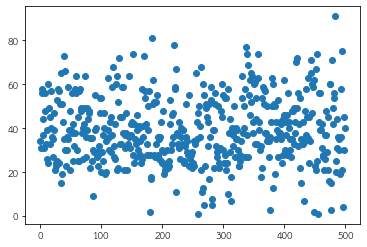

In [ ]:
plt.scatter(range(len(my_data)),my_data)

### Sort

In [ ]:
my_data_sorted = my_data.sort_values()  # การ Sort ข้อมูล

In [ ]:
my_data_sorted

2455     1.0
2259     1.0
2180     2.0
2448     2.0
2376     3.0
        ... 
2494    75.0
2337    77.0
2219    78.0
2183    81.0
2483    91.0
Name: age, Length: 500, dtype: float64

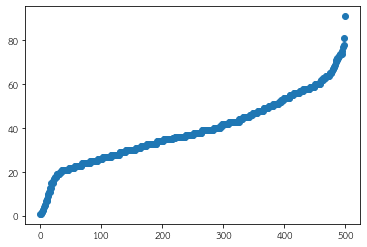

In [ ]:
plt.scatter(range(len(my_data)), my_data_sorted)

### Bin - Rep

In [ ]:
import numpy as np

0 :50 i=0 50i : (50i)+50

50 :100 i=1 50i : (50i)+50

100:150 i=2 50i : (50i)+50

ตัดช่วงข้อมูล ทีละ 50

In [ ]:
bin = 10
bin_r = list()
step = int(len(my_data_sorted)/bin)
for i in range(bin):
    this_data = my_data_sorted[(step*i):(step*i)+step]    #ตัดข้อมูล [():()+...]
    rep = np.mean(this_data)   #เลือกตัวแทน
    bin_r.append(rep)

In [ ]:
list(range(0,len(my_data_sorted),50))

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450]

In [ ]:

bin = 10  #เลือกข้อมูลมา10ตัว
bin_r = list()
step = int(len(my_data_sorted)/bin)
for start in range(0,len(my_data_sorted),50):
    this_data = my_data_sorted[start:start+step]    #ตัดข้อมูล
    rep = np.mean(this_data)  #เลือกตัวแทน
    bin_r.append(rep)

In [ ]:
bin_r

[14.74,
 24.0,
 28.24,
 32.28,
 35.82235762327721,
 39.14,
 43.84,
 49.74,
 56.56,
 67.0]

### Smooth

In [ ]:
my_data_smoothed = list()
step = 0
this_bin = 0
for i in my_data_sorted:
    if step < 50:
        my_data_smoothed.append({'old_v':i,'new_v':bin_r[this_bin]})
        step = step + 1
    else:
        step = 0
        this_bin = this_bin + 1
        my_data_smoothed.append({'old_v':i,'new_v':bin_r[this_bin]})


In [ ]:

my_data_smoothed

[{'new_v': 14.74, 'old_v': 1.0},
 {'new_v': 14.74, 'old_v': 1.0},
 {'new_v': 14.74, 'old_v': 2.0},
 {'new_v': 14.74, 'old_v': 2.0},
 {'new_v': 14.74, 'old_v': 3.0},
 {'new_v': 14.74, 'old_v': 3.0},
 {'new_v': 14.74, 'old_v': 4.0},
 {'new_v': 14.74, 'old_v': 5.0},
 {'new_v': 14.74, 'old_v': 5.0},
 {'new_v': 14.74, 'old_v': 7.0},
 {'new_v': 14.74, 'old_v': 7.0},
 {'new_v': 14.74, 'old_v': 8.0},
 {'new_v': 14.74, 'old_v': 9.0},
 {'new_v': 14.74, 'old_v': 10.0},
 {'new_v': 14.74, 'old_v': 11.0},
 {'new_v': 14.74, 'old_v': 11.0},
 {'new_v': 14.74, 'old_v': 13.0},
 {'new_v': 14.74, 'old_v': 13.0},
 {'new_v': 14.74, 'old_v': 15.0},
 {'new_v': 14.74, 'old_v': 15.0},
 {'new_v': 14.74, 'old_v': 15.0},
 {'new_v': 14.74, 'old_v': 16.0},
 {'new_v': 14.74, 'old_v': 17.0},
 {'new_v': 14.74, 'old_v': 17.0},
 {'new_v': 14.74, 'old_v': 18.0},
 {'new_v': 14.74, 'old_v': 18.0},
 {'new_v': 14.74, 'old_v': 18.0},
 {'new_v': 14.74, 'old_v': 19.0},
 {'new_v': 14.74, 'old_v': 19.0},
 {'new_v': 14.74, 'old_v': 

In [ ]:
my_df = pd.DataFrame(my_data_smoothed) #แปลง Dict เป็น ตาราง pandas (ยังไม่ได้สอน)
my_df

,old_v,new_v
0,1.0,14.74
1,1.0,14.74
2,2.0,14.74
3,2.0,14.74
4,3.0,14.74
...,...,...
495,75.0,67.00
496,77.0,67.00
497,78.0,67.00
498,81.0,67.00


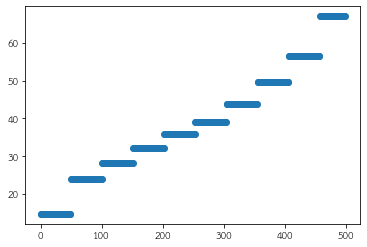

In [ ]:
plt.scatter(range(len(my_data)),my_df['new_v'])  #การนำข้อมูลที่smooth แล้วมาทำการplot กราฟ

### การแทนค่ากลับลงไปในตาราง

## การต่อตาราง (แนวแกน X)

หาจำนวนร้านค้าที่แสดงเป็นอันดับที่ 1-4 ที่ถูกกดเข้าไปดูหลังจาก search โดยร้านค้าตั้งอยู่ที่เชียงใหม่

In [ ]:
w_res = pd.read_csv(os.path.join(path,'w_restaurant.csv')) 
w_res.head()

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,NaN,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,NaN,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN


In [ ]:
search_click = pd.read_csv(os.path.join(path,'search_click.csv')) 
search_click.head()

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True


In [ ]:
w_res[w_res['city_name']=='Chiang Mai']  # เลือกร้านที่อยู่้เชียงใหม่ 

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
36,70,Wrap Master,1,0,Chiang Mai,NaN,w5q6unc,0,3.629630,NaN,16.0,3,0,2762,3,0,2,Food Truck,1.0,NaN,3.0,0.0,1.0,1.0,0.0,NaN,NaN,5.0,0.0,0.0,0.0,1.0
40,75,Sozen,1,0,Chiang Mai,NaN,w5q6unh,0,3.000000,NaN,8.0,1,1,1080,1,0,14,Noodles,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,98,ไวท์ดราก้อน หมูกะทะ,1,0,Chiang Mai,NaN,w5q6vwb,0,4.000000,NaN,2.0,1,0,465,0,0,1,Buffet,2.0,NaN,3.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,111,เต-ชา ก๋วยเตี๋ยวไข่ไดโนเสาร์,1,0,Chiang Mai,NaN,w5qqhjs,0,3.984000,NaN,56.0,26,6,7750,5,0,16,Noodles,1.0,NaN,1.0,0.0,1.0,1.0,0.0,NaN,1.0,2.0,0.0,0.0,0.0,0.0
79,147,ก๋วยเตี๋ยวเรือสะใจ,1,0,Chiang Mai,NaN,w5q6vrg,0,3.576923,NaN,4.0,2,1,424,3,0,0,Noodles,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246783,339922,ส้มตำลำฮิมกอง,1,0,Chiang Mai,NaN,w5npkmc,1,4.000000,NaN,NaN,1,0,373,0,0,0,North East,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
246803,339957,ไก่ทอดปักษ์ใต้ นายหัวโต,1,0,Chiang Mai,50180,w5q7hpk,0,4.060606,NaN,10.0,6,1,2260,1,0,0,Street Food/Food Stands,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246808,339976,แคลิฟอร์เนียเวร็ป,1,0,Chiang Mai,50230,w5q67k8,0,0.000000,NaN,NaN,0,0,166,0,0,0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246813,339998,TOONGs COFFEE Roasters,1,0,Chiang Mai,50230,w5q6e0g,0,0.000000,NaN,2.0,0,0,831,0,0,0,Café/Coffee Shop,1.0,NaN,3.0,0.0,1.0,1.0,0.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN


In [ ]:
search_click.iloc[0,0]

'11:38.9'

In [ ]:
from datetime import datetime

In [ ]:
pd.to_datetime(search_click.iloc[0,0])

Timestamp('2021-09-17 11:38:54')


หา records ที่ถูก click เวลา 4-6 โมงเย็น

ตรวจสอบชนิดข้อมูล

In [ ]:
search_click[(search_click['display_position'] >=0)&(search_click['display_position'] <=3)]

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True
...,...,...,...,...,...,...
1047860,00:56.4,b5daef50-9080-40b3-be44-9b62a7dd1f9e,235344.0,3,2.360510e+11,False
1047861,57:44.9,74fbd9f7-7f78-45df-ae88-df6e4a911f15,122491.0,3,2.199750e+11,False
1047862,59:39.1,74fbd9f7-7f78-45df-ae88-df6e4a911f15,122491.0,3,3.342300e+11,False
1047863,54:14.9,74fbd9f7-7f78-45df-ae88-df6e4a911f15,122491.0,3,1.003326e+10,False


In [ ]:
search_click[(search_click['display_position'] >=0)&(search_click['display_position'] <=3)].drop_duplicates(subset=['business_id'])

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True
...,...,...,...,...,...,...
1047799,44:03.1,fef3cdc7-36cf-4b77-b7a8-dc09ead97c7f,272927.0,3,1.249003e+10,False
1047829,58:02.2,35431bee-ce45-43c5-88ee-fd3fcf149937,157451.0,3,3.771037e+10,False
1047841,24:35.6,23494745-eacb-4c0c-8922-2f8776720459,132367.0,3,4.365582e+10,False
1047848,49:27.0,b7dff340-d27d-42ce-866a-bfb3b8f595ba,231075.0,3,2.156844e+10,False


In [ ]:
search_click_14 = search_click[(search_click['display_position'] >=0)&(search_click['display_position'] <=3)].drop_duplicates(subset=['business_id'])

In [ ]:
search_click_14 

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True
...,...,...,...,...,...,...
1047799,44:03.1,fef3cdc7-36cf-4b77-b7a8-dc09ead97c7f,272927.0,3,1.249003e+10,False
1047829,58:02.2,35431bee-ce45-43c5-88ee-fd3fcf149937,157451.0,3,3.771037e+10,False
1047841,24:35.6,23494745-eacb-4c0c-8922-2f8776720459,132367.0,3,4.365582e+10,False
1047848,49:27.0,b7dff340-d27d-42ce-866a-bfb3b8f595ba,231075.0,3,2.156844e+10,False


## การต่อตาราง แนวแกน X  มี 2 คำสั่ง

* merge two table(.merge())

* copy a column from other table (.map()) คล้าย ๆ merge แต่ดึงมาแค่บางคอลัมน์

Merge()




In [ ]:
merge_table = search_click_14.merge(w_res,how='left',left_on='business_id',right_on='id')
merge_table

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True,298839.0,ปูดองอันยอง Eight,1.0,0.0,Bangkok Metropolitan Region,10110,w4rw0g9,0.0,3.836735,12.0,22.0,3.0,0.0,22484.0,1.0,5.0,0.0,Seafood,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True,171372.0,Yoshinoya,1.0,0.0,Bangkok Metropolitan Region,NaN,w4rteh0,0.0,3.118367,28.0,60.0,43.0,6.0,18373.0,41.0,34.0,37.0,Japanese,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,0.0,3.0,NaN,NaN,NaN,1.0
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True,16157.0,The Hub Cafe and Eatery,1.0,0.0,Bangkok Metropolitan Region,NaN,w4rw1tu,0.0,4.015184,NaN,348.0,36.0,0.0,27252.0,21.0,13.0,58.0,Cafe,3.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True,89741.0,ซั่งไห่ เสี่ยวหลงเปา,1.0,0.0,Bangkok Metropolitan Region,10900,w4rw8p7,0.0,3.444134,NaN,101.0,21.0,7.0,54847.0,19.0,43.0,32.0,Dim Sum,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,1.0
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True,189564.0,Yoshinoya,1.0,0.0,Bangkok Metropolitan Region,10110,w4rw0kc,0.0,2.972672,28.0,32.0,69.0,8.0,13851.0,22.0,66.0,26.0,Japanese,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78805,44:03.1,fef3cdc7-36cf-4b77-b7a8-dc09ead97c7f,272927.0,3,1.249003e+10,False,272927.0,At Taste,1.0,0.0,Bangkok Metropolitan Region,NaN,w4rt9fq,0.0,3.000000,NaN,4.0,1.0,1.0,805.0,3.0,0.0,8.0,Fastfood,1.0,NaN,3.0,1.0,0.0,1.0,0.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN
78806,58:02.2,35431bee-ce45-43c5-88ee-fd3fcf149937,157451.0,3,3.771037e+10,False,157451.0,KFC,1.0,0.0,Bangkok Metropolitan Region,11000,w4rqzfk,0.0,4.004237,629.0,11.0,14.0,5.0,11974.0,4.0,0.0,4.0,Fastfood,1.0,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78807,24:35.6,23494745-eacb-4c0c-8922-2f8776720459,132367.0,3,4.365582e+10,False,132367.0,ฮอฟมันเฮ้าส์,1.0,0.0,Bangkok Metropolitan Region,10240,w4rw73f,0.0,3.488889,NaN,2.0,2.0,0.0,1813.0,2.0,0.0,5.0,Other,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78808,49:27.0,b7dff340-d27d-42ce-866a-bfb3b8f595ba,231075.0,3,2.156844e+10,False,231075.0,Hair Day By Lamdoun,2.0,0.0,Bangkok Metropolitan Region,NaN,w4rqrg4,0.0,5.000000,NaN,NaN,1.0,0.0,172.0,0.0,0.0,0.0,Hair Wash,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN


In [ ]:
search_click_14['shop_location'] = search_click_14['business_id'].map(w_res.set_index('id')['city_name']) # จำนวนร้านที่ถูกแสดงเป็นอันดับที่ 1-4
search_click_14

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,shop_location
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True,Bangkok Metropolitan Region
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True,Bangkok Metropolitan Region
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True,Bangkok Metropolitan Region
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True,Bangkok Metropolitan Region
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True,Bangkok Metropolitan Region
...,...,...,...,...,...,...,...
1047799,44:03.1,fef3cdc7-36cf-4b77-b7a8-dc09ead97c7f,272927.0,3,1.249003e+10,False,Bangkok Metropolitan Region
1047829,58:02.2,35431bee-ce45-43c5-88ee-fd3fcf149937,157451.0,3,3.771037e+10,False,Bangkok Metropolitan Region
1047841,24:35.6,23494745-eacb-4c0c-8922-2f8776720459,132367.0,3,4.365582e+10,False,Bangkok Metropolitan Region
1047848,49:27.0,b7dff340-d27d-42ce-866a-bfb3b8f595ba,231075.0,3,2.156844e+10,False,Bangkok Metropolitan Region


จำนวนร้าน ที่ถูกแสดงเป็นอันดับที่ 1-4 ที่อยู่เชียงใหม่

In [ ]:

search_click_14[search_click_14['shop_location']=='Chiang Mai']  # จำนวนร้าน ที่ถูกแสดงเป็นอันดับที่ 1-4 ที่อยู่เชียงใหม่

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,shop_location
64,07:53.8,2aa86733-1c7e-4f88-8afd-b82142c173d5,259084.0,1,1.750610e+11,False,Chiang Mai
70,25:35.6,928901b8-9ee1-4a9b-b64c-0c907b45ba6b,117170.0,1,3.861933e+09,False,Chiang Mai
82,00:41.4,8ba41c9a-682e-42fd-aad1-60b11b50513d,152175.0,2,3.797080e+11,False,Chiang Mai
90,25:58.9,fd25c7a1-ef2a-4b98-ad6c-dfa4d05a931f,329257.0,2,2.713499e+10,False,Chiang Mai
91,14:57.5,429feb9d-aa01-485e-8caf-935e837455e4,82316.0,2,5.013867e+10,False,Chiang Mai
...,...,...,...,...,...,...,...
1047097,11:08.7,96089d64-2484-494a-962c-467f66fa8f32,298219.0,2,3.117871e+10,False,Chiang Mai
1047717,02:31.3,d9f1ecf1-1aca-4a7e-8705-17bae4af6cea,237556.0,3,7.526850e+10,False,Chiang Mai
1047723,03:43.2,c1a71af2-2b64-4ca3-a08a-cbe91c3917c7,277018.0,3,1.889493e+10,False,Chiang Mai
1047727,42:39.8,206b211b-f057-4ac1-b3ee-3e69098be27a,178394.0,3,1.861920e+12,False,Chiang Mai


In [ ]:
search_click_14[search_click_14['shop_location']=='Chiang Mai'].shape[0] # code เพื่อเรียกจำนวนแถวของข้อมูล  จำนวนร้าน ที่ถูกแสดงเป็นอันดับที่ 1-4 ที่อยู่เชียงใหม่

5159

ต่อ Smooth by Binning

In [ ]:
dataALL_cut = dataALL.iloc[2000:2500,:5] 
dataALL_cut

,No.,announce_date,Notified date,sex,age
2000,2001,2020-04-04,3/4/2020,ชาย,34.0
2001,2002,2020-04-04,3/4/2020,หญิง,31.0
2002,2003,2020-04-04,3/4/2020,หญิง,58.0
2003,2004,2020-04-04,3/4/2020,หญิง,56.0
2004,2005,2020-04-04,3/4/2020,หญิง,37.0
...,...,...,...,...,...
2495,2496,2020-04-11,10/4/2020,ชาย,21.0
2496,2497,2020-04-11,10/4/2020,หญิง,4.0
2497,2498,2020-04-11,10/4/2020,ชาย,45.0
2498,2499,2020-04-11,10/4/2020,หญิง,30.0


In [ ]:
my_df

,old_v,new_v
0,1.0,14.74
1,1.0,14.74
2,2.0,14.74
3,2.0,14.74
4,3.0,14.74
...,...,...
495,75.0,67.00
496,77.0,67.00
497,78.0,67.00
498,81.0,67.00


In [ ]:
my_df_unique = my_df.drop_duplicates(subset=['old_v'])
my_df_unique

,old_v,new_v
0,1.0,14.74
2,2.0,14.74
4,3.0,14.74
6,4.0,14.74
7,5.0,14.74
...,...,...
495,75.0,67.00
496,77.0,67.00
497,78.0,67.00
498,81.0,67.00


In [ ]:
dataALL_cut['smooth_age'] = dataALL_cut['age'].map(my_df_unique.set_index('old_v')['new_v'])
dataALL_cut

,No.,announce_date,Notified date,sex,age,smooth_age
2000,2001,2020-04-04,3/4/2020,ชาย,34.0,32.280000
2001,2002,2020-04-04,3/4/2020,หญิง,31.0,32.280000
2002,2003,2020-04-04,3/4/2020,หญิง,58.0,56.560000
2003,2004,2020-04-04,3/4/2020,หญิง,56.0,56.560000
2004,2005,2020-04-04,3/4/2020,หญิง,37.0,35.822358
...,...,...,...,...,...,...
2495,2496,2020-04-11,10/4/2020,ชาย,21.0,14.740000
2496,2497,2020-04-11,10/4/2020,หญิง,4.0,14.740000
2497,2498,2020-04-11,10/4/2020,ชาย,45.0,43.840000
2498,2499,2020-04-11,10/4/2020,หญิง,30.0,28.240000


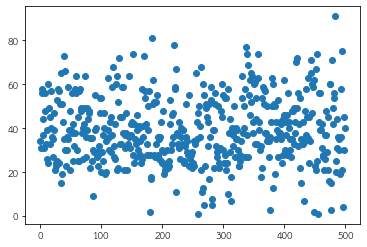

In [ ]:
plt.scatter(range(len(my_data)),my_data)  # ข้อมูลก่อนทำการ smoot

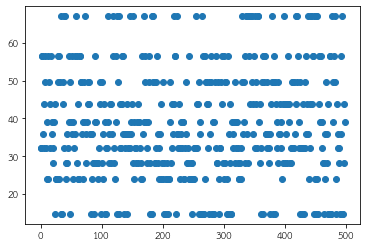

In [ ]:
plt.scatter(range(len(my_data)),dataALL_cut['smooth_age'])  # กราฟแสดงข้อมูลที่ำการ Smootเรียบร้อยแล้ว

## [PD] Group by

In [ ]:
search_click.groupby('ads').count()

,click_timestamp,search_id,business_id,display_position,time_diff_nanos
ads,,,,,
False,1019994,1019973,1019642,1019994,1019994
True,28581,28581,28581,28581,28581


In [ ]:
search_click[search_click['ads']==True].shape[0]

28581

In [ ]:
search_click[search_click['ads']==False].shape[0]

1019994

ร้านไหนมีคน click เข้าไปดูมากที่สุด โดยพิจารณาจาก การ search 100 ครั้งล่าสุด

หาการ search 100 ครั้งล่าสุด

In [ ]:
search100 = search_click.sort_index(ascending=False).iloc[:100,:] # เมื่อาร้านที่มีการ Seart มากที่สุก 100 อันดับแรก
search100

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
1048574,13:51.4,5741d9cf-b9f1-441d-aa83-d2b0179bf874,310448.0,8,3.157757e+10,False
1048573,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False
1048572,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False
1048571,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False
1048570,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False
...,...,...,...,...,...,...
1048479,19:25.9,54eaa7da-5329-4a57-828d-42a3b52bbf89,155123.0,7,3.979521e+10,False
1048478,49:08.8,ef57982e-9e44-4916-a523-2335856f3a4c,144113.0,7,2.615840e+11,False
1048477,45:58.0,ef57982e-9e44-4916-a523-2335856f3a4c,144113.0,7,7.082640e+10,False
1048476,18:50.9,f2daaf36-3abd-4971-a13b-0abd1dabae23,317812.0,7,9.191297e+10,False


In [ ]:
search100.groupby('business_id').count() # Group by business_id และเือกจำนวนที่มีการ seaart

,click_timestamp,search_id,display_position,time_diff_nanos,ads
business_id,,,,,
9640.0,1,1,1,1,1
11387.0,1,1,1,1,1
12133.0,1,1,1,1,1
44441.0,3,3,3,3,3
61441.0,4,4,4,4,4
...,...,...,...,...,...
321885.0,1,1,1,1,1
323374.0,1,1,1,1,1
331866.0,1,1,1,1,1


In [ ]:
search100.groupby('business_id').count().sort_values(by=['click_timestamp'],ascending=False)

,click_timestamp,search_id,display_position,time_diff_nanos,ads
business_id,,,,,
130270.0,5,5,5,5,5
61441.0,4,4,4,4,4
98956.0,4,4,4,4,4
109141.0,3,3,3,3,3
207208.0,3,3,3,3,3
...,...,...,...,...,...
196321.0,1,1,1,1,1
11387.0,1,1,1,1,1
204481.0,1,1,1,1,1


In [ ]:
search100.groupby('business_id').count().sort_values(by=['click_timestamp'],ascending=False).reset_index()

,business_id,click_timestamp,search_id,display_position,time_diff_nanos,ads
0,130270.0,5,5,5,5,5
1,61441.0,4,4,4,4,4
2,98956.0,4,4,4,4,4
3,109141.0,3,3,3,3,3
4,207208.0,3,3,3,3,3
...,...,...,...,...,...,...
65,196321.0,1,1,1,1,1
66,11387.0,1,1,1,1,1
67,204481.0,1,1,1,1,1
68,206253.0,1,1,1,1,1


In [ ]:
topsearch = search100.groupby('business_id').count().sort_values(by=['click_timestamp'],ascending=False).reset_index().iloc[0,0]
topsearch

130270.0

In [ ]:
w_res[w_res['id']==topsearch]['name']

83878    Audrey Café
Name: name, dtype: object

แต่ละจังหวัดมีอายุเฉลี่ยของคนที่ตรวจพบโรคเป็นกี่ปี (เรียงจากน้อยไปหามาก)

In [ ]:
dataALL

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new col
0,1,2020-01-12,99/99/9999,หญิง,61.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,0
1,2,2020-01-17,99/99/9999,หญิง,74.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,1
2,3,2020-01-22,99/99/9999,หญิง,73.00000,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,2
3,4,2020-01-22,99/99/9999,ชาย,68.00000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,3
4,5,2020-01-24,99/99/9999,หญิง,66.00000,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...
512617,512618,2021-07-26,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512617
512618,512619,2021-07-26,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512618
512619,512620,2021-07-26,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512619
512620,512621,2021-07-26,25/7/2021,ชาย,35.52947,ปี,ไทย?,ชลบุรี,ทัณฑสถาน/เรือนจำ,NaN,NaN,512620


In [ ]:
dataALL.groupby('province_of_onset').mean()

,No.,age,new col
province_of_onset,,,
กระบี่,209767.779487,31.191337,209766.779487
กรุงเทพมหานคร,256420.533612,36.874415,256419.533612
กัมพูชา,294560.833333,31.500000,294559.833333
กาญจนบุรี,333000.799141,37.053101,332999.799141
กาฬสินธิ์,406290.333333,31.333333,406289.333333
...,...,...,...
เวียงจันทร์,41531.000000,26.000000,41530.000000
เวียงสา,392002.600000,35.529470,392001.600000
แพร่,321364.602709,35.893641,321363.602709


In [ ]:
dataprovage = dataALL.groupby('province_of_onset').mean().reset_index()[['province_of_onset','age']]  # ตัดเฉพาะ colum ที่ต้องการ
dataprovage.sort_values(by=['age']) # เรียงลำดับ ของคอลัม age

,province_of_onset,age
40,นครศรีีธรรมราช,2.000000
64,ปลายพระยา,15.000000
11,จ.ปัตตานี,16.000000
48,นาวัง,19.000000
116,สมทรสาคร,19.000000
...,...,...
127,สมุุทรสงคราม,53.505894
74,พระนครศีอยุธยา,54.500000
88,ยานนาวา,57.000000
108,ศีรษะเกษ,66.000000


In [ ]:
TH_province = pd.read_csv(os.path.join(path,'TH_province.csv'))  # เรียกตารางจากไดร์ฟ 
TH_province

,อันดับ,จังหวัด,Unnamed: 2
0,1,นครราชสีมา,NaN
1,2,เชียงใหม่,NaN
2,3,กาญจนบุรี,NaN
3,4,ตาก,NaN
4,5,อุบลราชธานี,NaN
...,...,...,...
72,73,สมุทรสาคร,NaN
73,74,สิงห์บุรี,NaN
74,75,นนทบุรี,NaN
75,76,ภูเก็ต,NaN


In [ ]:
TH_province = TH_province.iloc[:,:2] # ตัดคอลัม unnamed
TH_province

,อันดับ,จังหวัด
0,1,นครราชสีมา
1,2,เชียงใหม่
2,3,กาญจนบุรี
3,4,ตาก
4,5,อุบลราชธานี
...,...,...
72,73,สมุทรสาคร
73,74,สิงห์บุรี
74,75,นนทบุรี
75,76,ภูเก็ต


เชื่อมตารางโดยช่ตีย์เป็นชื่อจังหวัด

.map คือการเชื่อม

In [ ]:
TH_province['avg_age'] = TH_province['จังหวัด'].map(dataprovage.set_index('province_of_onset')['age']) # การเชือมตารางเพื่อให้ได้จังหวัดที่ถูกต้อง และเรียงกัน
TH_province.sort_values(by=['avg_age'])

,อันดับ,จังหวัด,avg_age
7,8,แม่ฮ่องสอน,27.062129
63,64,สตูล,29.910839
26,27,สระแก้ว,31.037537
44,45,กระบี่,31.191337
52,53,พังงา,31.598954
...,...,...,...
38,39,สุพรรณบุรี,37.149560
74,75,นนทบุรี,37.202312
53,54,ยโสธร,38.306257
73,74,สิงห์บุรี,38.431886


ใส่ตาราง


## [PD] Sample record

In [ ]:
dataALL.shape

In [ ]:
dataALL.sample(n=100)

## bootstrap sampling (สุ่มแบบใส่คืน)

In [ ]:
dataALL.sample(n=100,replace=True)

## [PD] Save file

In [ ]:
TH_province.sort_values(by=['avg_age']).to_csv('avg_age_prov.csv') # ใส่รูปภาพ


In [ ]:

sales = [{'account':'Jones LLC', 'Jan':150, 'Feb':200, 'Mar':140},
         {'account':'Alpha Co', 'Jan':200, 'Feb':210, 'Mar':215},
         {'account':'Blue Inc', 'Jan':50, 'Feb':90, 'Mar':95}]
df = pd.DataFrame(sales)
df

In [ ]:
sales = [['Jones LLC',150,200,140],
         ['Alpha Co',200,210,215],
         ['Blue Inc',50,90,95]]
labels = ['account','Jan','Feb','Mar']
df = pd.DataFrame.from_records(sales,columns=labels)
df

## Pre-test

เมืองไหนที่มีค่าเฉลี่ยของ 'weighted_average_rating' สูงที่สุด (จากตาราง w_res กับ search_click)

In [ ]:
w_res.sort_values(by=['number_of_reviews'],ascending=False)

In [ ]:
plt.plot(range(len(w_res)),w_res.sort_values(by=['number_of_reviews'],ascending=False)['number_of_reviews'],'.b')

In [ ]:
review100up = w_res[w_res['number_of_reviews']>100]
review100up

In [ ]:
review100up.groupby('city_name').mean().sort_values(by=['weighted_average_rating'],ascending=False)